# Assignment Netwerkanalyse

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Una Garcia|12722707|
|Dennis de Buck|12903000|
|Cesar Groot Kormelink|12830216|
|Mick van den Boer|11423870|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

Cijfer per student:
 12722707    7.1
12903000    7.4
12830216    7.1
11423870    6.4
dtype: float64


12722707  12903000  12830216  11423870
12722707      0.25      0.28      0.25      0.22
12903000      0.26      0.25      0.26      0.23
12830216      0.25      0.28      0.25      0.22
11423870      0.26      0.24      0.26      0.24

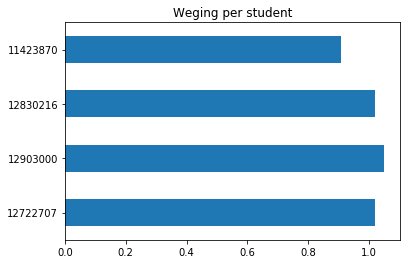

In [1]:
import pandas as pd
%matplotlib inline

def cijfer_per_student(weging,cijfer=7):
    return round(weging*cijfer,1)

weging= {
        '12722707': {'12722707':.25, '12903000':.28, '12830216':.25, '11423870':.22},
        '12903000': {'12722707':.26, '12903000':.25, '12830216':.26, '11423870':.23},
        '12830216': {'12722707':.25, '12903000':.28, '12830216':.25, '11423870':.22},
        '11423870': {'12722707':.26, '12903000':.24, '12830216':.26, '11423870':.24},
        }
# verander hier niks aan
df= pd.DataFrame(weging).T
assert all((df.sum(1)==1).values) # per student moeten de gewichten optellen tot 1
df.sum().plot(kind='barh', title='Weging per student');
print("Cijfer per student:\n",cijfer_per_student(df.sum()))
df

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instructie" data-toc-modified-id="Instructie-1">Instructie</a></span></li><li><span><a href="#Definieer-familie-relaties-en-LHBTQI++" data-toc-modified-id="Definieer-familie-relaties-en-LHBTQI++-2">Definieer familie relaties en LHBTQI++</a></span><ul class="toc-item"><li><span><a href="#1-De-gebruikelijke-familierelaties" data-toc-modified-id="1-De-gebruikelijke-familierelaties-2.1">1 De gebruikelijke familierelaties</a></span><ul class="toc-item"><li><span><a href="#Jullie-opdracht" data-toc-modified-id="Jullie-opdracht-2.1.1">Jullie opdracht</a></span></li><li><span><a href="#Networkx" data-toc-modified-id="Networkx-2.1.2">Networkx</a></span></li></ul></li></ul></li><li><span><a href="#Uitwerking-van-opdracht-1" data-toc-modified-id="Uitwerking-van-opdracht-1-3">Uitwerking van opdracht 1</a></span></li><li><span><a href="#2-Definieer-LHBTQI+" data-toc-modified-id="2-Definieer-LHBTQI+-4">2 Definieer LHBTQI+</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Let-op!" data-toc-modified-id="Let-op!-4.0.1">Let op!</a></span></li></ul></li><li><span><a href="#Jullie-opdracht" data-toc-modified-id="Jullie-opdracht-4.1">Jullie opdracht</a></span></li></ul></li><li><span><a href="#Uitwerking-van-opdracht-2" data-toc-modified-id="Uitwerking-van-opdracht-2-5">Uitwerking van opdracht 2</a></span></li></ul></div>

# Instructie

* 2 opdrachten, elke opdracht kent een Markdown (tekst) deel en een programmeer deel. Voor elk deel kan je 10 punten verdienen. In totaal zijn er dus 40 punten te verdienen.
* Succes! Maak er wat moois van!
* Let op, dit is een vrije opdracht, en er zijn dus meerdere antwoorden goed. Het belangrijkste is dat jullie er over praten, zowel in je groepje als daarbuiten. **Geef in je opdracht aan als je een speciale keuze hebt gemaakt, en geef dan ook de reden. Dat is veel leuker en beter dan dat te verzwijgen/verhullen. En levert je juist punten op.**

# Definieer familie relaties en LHBTQI++

In deze opdracht gaan jullie relaties definieren in termen van meer primitieve relaties. Ook ga je beperkingen op je modellen aanbrengen waarvan je vindt dat die gelden in onze wereld. Zo zorg je ervoor dat elk model van jouw theorie zo goed mogelijk overeenkomt met onze wereld.

## 1 De gebruikelijke familierelaties

* We werken met predicaatlogische modellen, en met een basistaal met 2 eigenschappen: $M$ en $V$, die staan voor de 2 traditionele geslachten, en 1 twee plaatsige relatie $R$, die staat voor *is ouder van*. Hieronder staat dus dat *piet een man is, en joke een vrouw en dat piet de ouder is van joke*:

$$M(piet), V(joke), R(piet,joke).$$
* Wij gaan nu 2 dingen doen:
    1. beperkingen opleggen aan de relaties
    2. nieuwe relaties definieren in termen van de 3 primtieve relaties $M,V,R$
        * in die nieuwe relaties kan je natuurlijk andere eerder gedefinieerde relaties weer gebruiken.
* **Voorbeelden**
* *Beperking:* 
    * Iedereen is man of vrouw (en nooit allebei tegelijk).
    * Iedereen heeft exact 2 ouders, een man en een vrouw.
* *Nieuwe relatie*
    * $Vader(x,y)$ precies dan en slechts dan alleen als x een ouder is van y en x een man is.
        * $\forall xy( Vader(x,y) \leftrightarrow R(x,y) \wedge M(x))$
    * $Opa(x,y)$ hiervoor gebruik je natuurlijk het $\exists z$    connectief.
        * Je kunt dit netjes definieren in termen van ouder en vader. 
    
### Jullie opdracht 

1. Definieer een flink aantal familierelaties.
2. Verzin minstens 1 bestaande familierelatie die je **niet in predicaatlogica** kunt definieren.
    * Leg uit wat er lastig/bijzonder aan is.
3. Geef een aantal beperkingen die (mogelijk) waar zouden kunnen zijn in de echte wereld.
    * Ik schrijf mogelijk omdat het voorbeeld hierboven dat iedereen precies 2 ouders heeft natuurlijk ook omstreden is. Dat geeft niet, je geeft dat dan gewoon aan. 
    * Beschrijf de beperking eerst in heel helder Nederlands, en geef daarnaast de exacte logische zin die erbij past.
    * Op $R$ kan je natuurlijk al heel wat beperkingen opleggen:
        * niemand is ouder van zichzelf
        * ouder is asymmetrisch
        * ....
    
### Networkx

* Maak nu een model van je eigen familie in networkx.
* Stop er minstens 50 mensen in (uit je hele groepje), geef ze allemaal een geslacht en leg de juiste relaties.
* Maak een mooi plaatje.
* Definieer met comprehensies alle relaties die je boven ook gedefinieerd hebt.
    * Maak ook een plaatje, en check dat het klopt.
* Zorg dat het er zo netjes en helder uitziet    dat je echt snel en makkelijk kunt checken dat het klopt.
    * Dit zijn dingen die voor zichzelf spreken: zorg dus ook dat het in jullie opdract zo is.
    
    
        


In [2]:
import networkx as nx
%matplotlib inline

{(0, 1), (3, 2), (1, 3), (3, 1), (1, 0), (3, 4), (0, 2)}


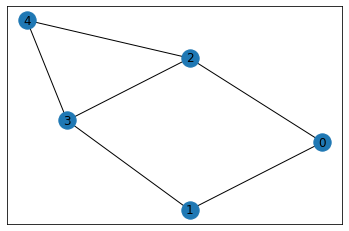

In [3]:
# Voorbeeld om je op weg te helpen

H= nx.house_graph()  # In het echt neem je natuurlijk een nx.Digraph !
H[1]
nx.draw_networkx(H)
M,V= {1,3,0},{2,4} # de mannen en de vrouwen in dit netwerk
# Nu even de attributen M en V goed zetten
for n in M:
    H.nodes[n]['M']=True
    H.nodes[n]['V']=False
for n in V:
    H.nodes[n]['V']=True
    H.nodes[n]['M']=False    
 

# wat handige afkortingen om de comprehensies zo veel mogelijk op je formules te laten lijken
G=H
def M(x, network=G):
    return network.nodes[x]['M']
def V(x, network=G):
    return network.nodes[x]['V']
def R(x,y,network=G):
    return network.has_edge(x,y)

# Vader(x,y) iff R(x,y) & M(x)
# Bijna hetzelfde als in deze comprehensie toch?
Vader= {(x,y) for x in H for y in H if R(x,y,H) and M(x,H)}
print(Vader)



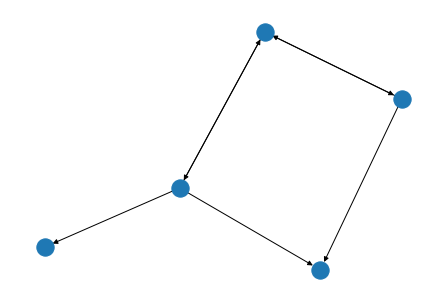

In [4]:
# Dit kan in het echt natuurlijk niet!

V = nx.DiGraph()
V.add_edges_from(Vader)
nx.draw_kamada_kawai(V)

In [5]:
# Voorbeeld met een existentiele quantifier
# Kan ook anders hoor.

H= nx.DiGraph()
H.add_edges_from([(0,1), (1,2), (1,4), (2,3)])


# Opa(x,y) iff M(x) & \exists z (R(x,z) & R(z,y) )
# hier laat ik de M(x) even weg
Opa= {(x,y) for x in H for y in H 
      if {z for z in H if R(x,z,H)} & {z for z in H if R(z,y,H)}}
Opa

{(0, 2), (0, 4), (1, 3)}

# Uitwerking van opdracht 1

* eerst in Markdown en Latex
* dan een blok in code

 1.  Vader
    * Elke man X die ouder is van iemand Y.
        * $\forall xy( Vader(x,y) \leftrightarrow M(x) \wedge R(x,y))$

2.  Moeder
    * Elke vrouw X die ouder is van iemand Y.
        * $\forall xy (Moeder(x,y) \leftrightarrow V(x) \wedge R(x,y))$

3. Zoon
    * Elke man X die een moeder Y heeft en een vader Z heeft.
        * $\forall xy (Zoon(x,y,z) \leftrightarrow M(x) \wedge Moeder(y,x) \wedge Vader(z,x))$

4. Dochter
    * Elke vrouw  X die een moeder Y heeft en een vader Z heeft.
        * $\forall xyz (Dochter(x,y,z) \leftrightarrow V(x) \wedge Moeder(y,x) \wedge Vader(z,x))$

5. Sibling (geen Nederlands woord voor, behalve 'ouderdeler')
    * Elke persoon X die dezelfde ouders heeft als een ander persoon Y.
        * $\forall xyza(Sibling(x,y) \leftrightarrow (Moeder(z,x) \wedge Moeder(z,y)) \wedge (Vader(a,x) \wedge Vader(a,y)) \wedge (x \neq y))$

6. Broer
    * Elke sibling die man is.
        * $\forall xy(Broer(x,y) \leftrightarrow \wedge Sibling(x,y) \wedge M(x)$

7. Zus
    * Elke sibling die vrouw is.
        * $\forall xy(Zus(x,y) \leftrightarrow Sibling(x,y) \wedge V(x))$


8. Grootvader
    * Elke vader X van een ouder Y.
        * $\forall xyz(Grootvader(x,y) \leftrightarrow \wedge Vader(x,z) \wedge R(z,y))$

9. Grootmoeder
    * Elke moeder X van een ouder Y.
        * $\forall xyz(Grootmoeder(x,y) \leftrightarrow \wedge Moeder(x,z) \wedge R(z,y))$

10. Oom
    * Elke broer X van een ouder Z.
        * $\forall xyz(Oom(x,y) \leftrightarrow (Broer(x,z) \wedge R(z,y)))$

11. Tante
    * Elke zus X van een ouder Z
        * $\forall xyz(Tante(x,y) \leftrightarrow (Zus(x,z) \wedge R(z,y)))$

12. Neef
    * Elke zoon X van oom  of tante Z
        * $\forall xyz(Neef(x,y) \leftrightarrow (Oom(z,y) \wedge Tante(z,y) \wedge R(z, x) \wedge M(x)))$

13. Neefje
    * Elke zoon X van een sibling Z
        * $\forall xyz(Neefje(x,y) \leftrightarrow M(x) \wedge Sibling(y,z) \wedge R(z,x))$

13. Nicht
    * Elke dochter X van oom en tante Z.
        * $\forall xyz(Nicht(x,y) \leftrightarrow (Oom(z,y) or Tante(z,y) \wedge R(z, x) \wedge V(x)))$

14. Nichtje
    *  Elke dochter X van een sibling Z
        *   $\forall xy(Neefje(x,y) \leftrightarrow V(X) \wedge \exists z(Sibling(z,y) \wedge R(z,x)))$
14. Overgrootvader
    * Iedereen die een vader X is van een grootmoeder of grootvader Z van een persoon Y
        * $\forall xyz(Overgrootvader(x,y) \leftrightarrow (Vader(x,z) \wedge Grootvader(z,y) \wedge Grootmoeder(z,y) ))$

15. Overgrootmoeder
    * Iedereen die een moeder X is van een grootmoeder of grootvader Z van een persoon Y
        * $\forall xyz(Overgrootmoeder(x,y) \leftrightarrow (Moeder(x,z) \wedge Grootvader(z,y) \wedge Grootmoeder(z,y) ))$

16. Kleinzoon
    * Elk kind X die man is met een ouder Y die een ouder Z heeft.
        * $\forall xyz(Kleinzoon(x,y) \leftrightarrow R(z,x) \wedge R(y,z) \wedge M(x))$

17. Kleindochter
    * Elk kind X die vrouw is met een ouder Y die een ouder Z heeft.
        * \forall xyz(Kleindochter(x,y) \leftrightarrow R(z,x) \wedge R(y,z) \wedge V(x))$

18. Halfbroer
    * Elke man X die alleen een vader Z óf alleen een moeder A deelt met een persoon Y.
        * $\forall xyza(Halfbroer(x,y) \leftrightarrow M(x) \wedge ((Moeder(a,x) \wedge Moeder(a,y) ) \oplus (Vader(z,x) \wedge Vader(z,y) ))$
19. Halfzus
    * Elke vrouw X die alleen een vader Z óf alleen een moeder A deelt met een ander persoon Y.
        * $\forall xyza(Halfzus(x,y) \leftrightarrow V(X) \wedge ((Moeder(a,x) \wedge Moeder(a,y) ) \oplus (Vader(z,x) \wedge Vader(z,y) ))$

Verzin minstens 1 bestaande familierelatie die je niet in predicaatlogica kunt definieren.
Leg uit wat er lastig/bijzonder aan is.

Met de drie relaties M, V en R (ouder van) kunnen geen aangetrouwde relaties zonder kinderen weergegeven worden. Alleen bloedverwante relaties kunnen weergegeven worden. Voorbeelden van onmogelijk te definiëren relaties zijn: stiefvader, stiefmoeder, stiefbroer en -zus, schoonmoeder, schoonvader, schoonbroer en -zus, etc.


Beperkingen voor definities:

* Iedereen is man of vrouw (en nooit allebei tegelijk).
    * $\forall x(M(x) \oplus V(x))$

* Iedereen heeft exact 2 ouders, een man en een vrouw.
    *  $\forall xyz(Persoon(x) \leftrightarrow R(y,x) \wedge M(y) \wedge R(y,z) \wedge V(z)$
    
* Niemand is ouder van zichzelf.
    * $\neg \exists x(R(x,x))$

* Niemand is kind en ouder van dezelfde persoon
    * $\neg \exists xy(R(y,x) \wedge R(x,y))$

* Niemand is ouder en opa van dezelfde persoon
    * $\neg \exists xyz((R(x,y) \wedge R(y,z)) \wedge R(x,z))$

* Niemand is ouder en broer van dezelfde persoon
    * $\neg \exists xy((R(x,y) \wedge Sibling(x,y) \wedge M(x)$ 

* Niemand is moeder en vader
    * $\neg \exists xyz((R(x,y) \wedge M(x)) \wedge (R(z,y) \wedge V(z)))$

* Niemand is opa en oma
    * $\neg \exists xy((Vader(x,z) \wedge R(z,y)) \wedge (Moeder(x,z) \wedge R(z,y)))$

* Iedere broer heeft dezelfde ouders
    * $\forall xyza(Sibling(x,y) \wedge M(x) \wedge R(z,x) \wedge R(z,y) \wedge R(a,x) \wedge R(a,y) \wedge z \neq a)$

* Iedere zus heeft dezelfde ouders
    * $\forall xyza(Sibling(x,y) \wedge V(x) \wedge R(z,x) \wedge R(z,y) wedge R(a,x) \wedge R(a,y) \wedge z \neq a)$

* Iedere broer heeft twee opa's
    * $\forall xyzabc(Sibling(x,y) \wedge M(x) \wedge (R(z,x) \wedge Vader(a,z)) \wedge (R(b,x) \wedge Vader(c,b)))$

Uitleg voor bepaalde keuzes bij de code:

Wij hebben de begrippen Neef/Nicht en Neefje/Nichtje opgesplitst, waarbij Neef/Nicht de kinderen van je oom en tante zijn, Neven en nichten van dezelfde generatie. Neefje/Nichtje bedragen de kinderen van je broer of zus, dus een generatie na de persoon


Wij hebben codes geschreven die voor elke familierelatie een set teruggeeft met daarin de nodes die deze relatie hebben. In de Set van Neef krijg je bijvoorbeeld (0,9), dit betekent 0 is de Neef van 9.
Tussen alle nodes per set een edge toevoegen zorgde voor een onoverzichtelijke graaf. Hierdoor hebben wij ervoor gekozen om van elk groepslid alleen zijn/haar eigen familierelaties aan te geven door middel van edges.


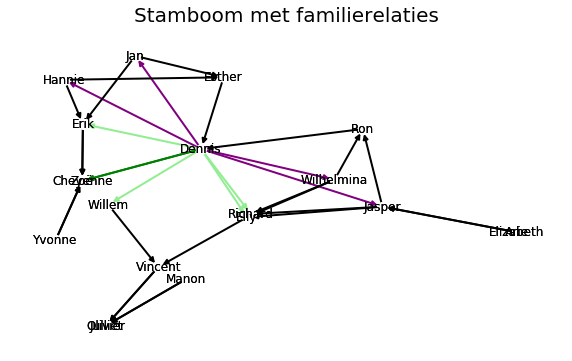

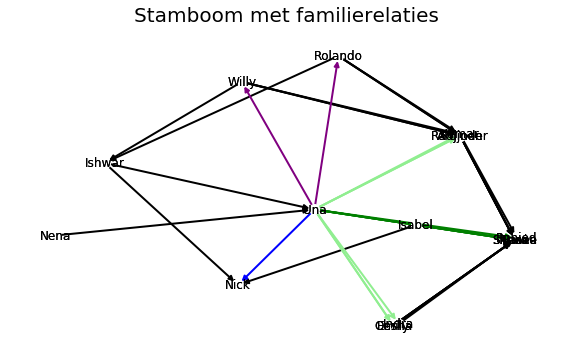

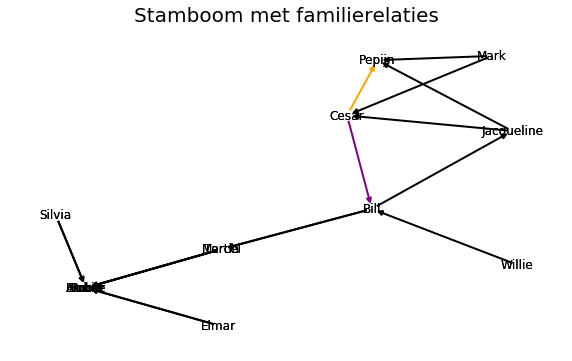

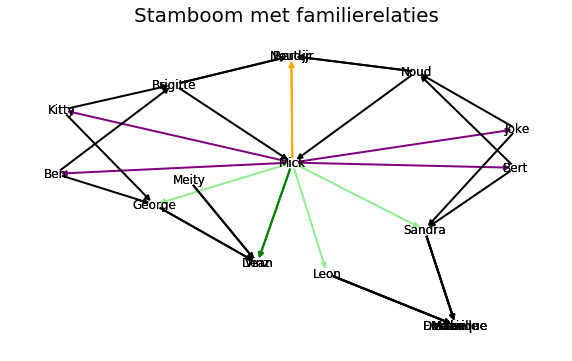

Dit zijn de eerste vijf vader relaties:  [(14, 17), (49, 51), (42, 43), (61, 62), (71, 76)] 
 Dit zijn de eerste vijf moeder relaties:  [(66, 72), (41, 40), (72, 73), (6, 2), (34, 35)] 
 Dit zijn de eerste vijf zoon  relaties:  [(35, 34), (23, 37), (60, 63), (1, 3), (25, 36)] 
 Dit zijn de eerste vijf dochter relaties:  [(73, 72), (72, 64), (29, 23), (16, 14), (2, 5)] 
 Dit zijn de eerste vijf broer/zus relaties:  [(22, 23), (74, 75), (61, 72), (23, 22), (63, 69)] 
 Dit zijn de eerste vijf grootvader relaties:  [(36, 29), (5, 9), (3, 0), (64, 74), (12, 16)] 
 Dit zijn de eerste vijf grootmoeder relaties:  [(11, 16), (6, 9), (66, 60), (66, 65), (53, 41)] 
 Dit zijn de eerste vijf oom relaties:  [(24, 30), (23, 31), (25, 31), (61, 76), (23, 32)] 
 Dit zijn de eerste vijf tante relaties:  [(2, 9), (72, 65), (2, 8), (63, 78), (11, 0)] 
 Dit zijn de eerste vijf overgrootvader relaties:  [(3, 35), (3, 52), (44, 70), (44, 4), (3, 7)] 
 Dit zijn de eerste vijf overgrootmoeder relaties:  [(11, 

In [6]:
#YOUR CODE HERE
import matplotlib.pyplot as plt

FamDen =    {(1,0), (2,0), (3,1), (4,1), (5,2), (6,2), (5,7), (6,7), (7,8), (7,9), (10,8), (10,9), (3,11), (4,11), (3,13),(4,13), (11,14), (12,14), (14,16), (15,16), (14,17), (15,17), (18,3),(19,3)}
FamUna =    {(21,20), (22,20), (22, 35), (23,29), (23,30), (24,31), (25, 32), (25, 33), (26, 29), (26, 30), (27, 31), (28, 32), (28, 33), (34, 35), (36, 22), (36, 23), (36, 24), (36, 25), (37, 22), (37, 23),             (37, 24), (37, 25)}
FamCes =    {(41,40), (42,40), (41,43), (42,43), (44,41), (44,45), (44,49), (45,46), (45,47), (48,46), (48,47), (49,51), (49,52),
            (50,51), (50,52), (53,44)}
FamMick =   {(61,62), (61,65), (61, 60), (63,62), (63, 65), (63,60), (66, 61), (66,72), (64, 61), (64, 72), (67, 63), (68, 63), (67, 69), (68, 69), (72, 73), (72, 74), (72, 75), (72, 76), (71, 73), (71, 74),             (71, 75,), (71, 76), (69, 77), (69, 78), (70, 77), (70, 78)}

FamGroepEdges = FamDen.union(FamUna).union(FamCes).union(FamMick)

FamGroepGraaf = nx.DiGraph()
FamGroepGraaf.add_edges_from(FamGroepEdges)

# Een dictionary om het voor onszelf bij te kunnen houden
FamDict = {
    0:  "Dennis",
    1:  "Ron",
    2:  "Esther",
    3:  "Jasper",
    4:  "Wilhelmina",
    5:  "Jan",
    6:  "Hannie",
    7:  "Erik",
    8:  "Cheyenne",
    9:  "Zoë",
    10  :"Yvonne",
    11: "Elly",
    12: "Willem",
    13: "Richard",
    14: "Vincent",
    15: "Manon",
    16: "Julliet",
    17: "Olivier",
    18: "Arie",
    19: "Elizabeth",
    20: "Una",
    21: "Nena",
    22: "Ishwar",
    23: "Ardjoen",
    24: "Kumar",
    25: "Radjinder",
    26: "Oesha",
    27: "Indra",
    28: "Emily",
    29: "Tara",
    30: "Ravi",
    31: "Rohied",
    32: "Sheena",
    33: "Shanee",
    34: "Isabel",
    35: "Nick",
    36: "Rolando",
    37: "Willy",
    40: "Cesar",
    41: "Jacqueline",
    42: "Mark",
    43: "Pepijn",
    44: "Bill",
    45: "Tertia",
    46: "Robin",
    47: "Roos",
    48: "Elmar",
    49: "Marcel",
    50: "Silvia",
    51: "Amber",
    52: "Esmee",
    53: "Willie",
    60: "Mick",
    61: "Noud",
    62: "Noud jr",
    63: "Brigitte",
    64: "Bert",
    65: "Bert jr",
    66: "Joke",
    67: "Kitty",
    68: "Ben",
    69: "George",
    70: "Meity",
    71: "Leon",
    72: "Sandra",
    73: "Maxime",
    74: "Michelle",
    75: "Frederique",
    76: "Dominique",
    77: "Dean",
    78: "Vinz"   
}

ManDen,VrouwDen =   {0,1,3,5,7,12,13,14,17,18},{2,4,6,8,9,10,11,15,16,19}
ManUna, VrouwUna =  {22, 23, 24, 25, 30, 31, 35, 36}, {20, 21, 26, 27, 28, 29, 32, 33, 34, 37}
ManCes, VrouwCes =  {40,42,43,44,46,48,49},{41,45,47,50,51,52,53}
ManMick, VrouwMick =    {60, 61, 62, 64, 65, 68, 69, 71, 77, 78}, {63, 66, 67, 70, 72, 73, 74, 75, 76}

Man = ManDen.union(ManUna).union(ManCes).union(ManMick)
Vrouw = VrouwDen.union(VrouwUna).union(VrouwCes).union(VrouwMick)

G = FamGroepGraaf.copy()

def M(x, network=G):
    return network.nodes[x]['M']
def V(x, network=G):
    return network.nodes[x]['V']
def R(x,y,network=G):
    return network.has_edge(x,y)

for n in Man:
    G.nodes[n]['M']=True
    G.nodes[n]['V']=False
for n in Vrouw:
    G.nodes[n]['V']=True
    G.nodes[n]['M']=False



 # Namen als attributen zetten  
for node in G.nodes:
    G.nodes[node]["naam"]=FamDict[node]

namen = nx.get_node_attributes(G, "naam") 

# Een mannelijke ouder x van persoon y
Vader = {(x,y) for x in G for y in G
        if R(x,y,G) and M(x,G)}

# Een vrouwelijke ouder x van persoon y
Moeder =    {(x,y) for x in G for y in G
            if R(x,y,G) and V(x,G)}

#Een mannelijk kind x van persoon y
Zoon =  {(x,y) for x in G for y in G
        if R(y,x,G) and M(x,G)}

# Een kind die vrouw is
Dochter =   {(x,y) for x in G for y in G
            if R(y,x,G) and V(x,G)}

#Twee personen die allebei dezelfde twee ouders hebben en van elkaar verschillen
Sibling =   {(x,y) for x in G for y in G
            if {(z, a) for z in G for a in G 
            if R(z,x,G) and R(z,y,G) and R(a,x,G) and R(a,y,G) and x != y and z != a}}

# Mannelijke sibling van y
Broer = {x for x in Sibling
        if M(x[0], G)}

# Vrouwelijke sibling van y
Zus =   {x for x in Sibling
        if V(x[0], G)}

#Vader van een ouder van y
Grootvader =    {(x[0],y) for x in Vader for y in G
                if {z for z in G
                if R(x[0],z,G) and R(z,y,G)}}

#Moeder van een ouder van y
Grootmoeder =   {(x[0],y) for x in Moeder for y in G
                if {z for z in G
                if R(x[0],z,G) and R(z,y,G)}}

# Broer van een ouder van y
Oom =   {(x[0],y) for x in Broer for y in G
        if R(x[1], y, G)}

# Zus van een ouder van y
Tante = {(x[0],y) for x in Zus for y in G
        if R(x[1],y,G)}
# Zoon van een oom/tante van y
Neef = {(x[1],y) for x in Oom for y in G
       if R(x[0],y,G) & M(x[1],G)} or {(x[1],y) for x in Tante for y in G
       if R(x[0],y,G) & M(x[1],G)}

# Dochter van een oom/tante van y
Nicht = {(x[1],y) for x in Oom for y in G
        if R(x[0],y,G) & V(x[1],G)} or {(x[1],y) for x in Tante for y in G
        if R(x[0],y,G) & V(x[1],G)}

# Vader van een neef/nicht van y
Ooms =  {(x[0],y) for x in Vader for y in G
        if {neef for neef in Neef.union(Nicht) if (x[1] == neef[0]) and (neef[1] == y)}} 

# Boer van ouder van y OF Vader van neef/nicht van y
Oomen = Ooms.union(Oom)

# Moeder van een neef/nicht van y
Tantes =    {(x[0],y) for x in Moeder for y in G
            if {neef for neef in Neef.union(Nicht) if (x[1] == neef[0]) and (neef[1] == y)}} 

# Zus van een ouder van Y OF moeder van een neef/nicht van y
Tanten =    Tantes.union(Tante)

#Zoon van een sibling
Neefje =    {(x[1],x[0]) for x in Oomen.union(Tanten)
            if M(x[1],G)}

# Dochter van een sibling
Nichtje =   {(x[1],x[0]) for x in Oomen.union(Tanten)
            if V(x[1],G)}

#Grootvader van een vader/moeder
Overgrootvader =    {(x[0],y) for x in Grootvader for y in G
                    if {(z, a) for z in Vader.union(Moeder) for a in G
                    if R(z[0], x[0], G)}}

# Grootmoeder van een vader/moeder
Overgrootmoeder = {(x[0],y) for x in Grootmoeder for y in G
                    if {(z, a) for z in Vader.union(Moeder) for a in G
                    if R(z[0], x[0], G)}}

# Zoon van een zoon/dochter
Kleinzoon = {(x[0],y) for x in Zoon for y in G
            if {z for z in Zoon.union(Dochter)
            if R(z[0], x[0], G) and R(y, z[0])}}

# Dochter van een zoon/dochter
Kleindochter = {(x[0],y) for x in Dochter for y in G
            if {z for z in Zoon.union(Dochter)
            if R(z[0], x[0], G) and R(y, z[0])}}

# Zoon van een ouder die een ander kind heeft met een andere moeder
Halfbroer = {(x,y) for x in G for y in G
            if {ouder for ouder in G for ouder2 in G 
            if (R(ouder,y,G) and R(ouder,x,G)) and (R(ouder2,y,G) ^ (R(ouder2,x,G))) and M(x,G)}}

# Dochter van een ouder die een ander kind heeft met een andere moeder
Halfzus =   {(x,y) for x in G for y in G
            if {ouder for ouder in G for ouder2 in G 
            if (R(ouder,y,G) and R(ouder,x,G)) and (R(ouder2,y,G) ^ (R(ouder2,x,G))) and V(x,G)}}


for n in G.edges:
     G.edges[n]['color']="Black"

for n in Kleinzoon.union(Kleindochter):
    if n[0]==0 or n[0] == 20 or n[0] == 40 or n[0] == 60:
        G.add_edge(n[0],n[1])
        G.edges[n[0],n[1]]["color"]="Purple"

for n in Neef.union(Nicht):
    if n[0] == 0 or n[0] == 20 or n[0] == 40 or n[0] == 60:
        G.add_edge(n[0],n[1])
        G.edges[n[0],n[1]]["color"]="Green"

for n in Neefje.union(Nichtje):
    if n[0] == 0 or n[0] == 20 or n[0] == 40 or n[0] == 60:
        G.add_edge(n[0],n[1])
        G.edges[n[0],n[1]]["color"]="LightGreen"

for n in Broer.union(Zus):
    if n[0] == 0 or n[0] == 20 or n[0] == 40 or n[0] == 60:
        G.add_edge(n[0],n[1])
        G.edges[n[0],n[1]]["color"]="Orange"

for n in Halfbroer.union(Halfzus):
    if n[0] == 0 or n[0] == 20 or n[0] == 40 or n[0] == 60:
        G.add_edge(n[0],n[1])
        G.edges[n[0],n[1]]["color"]="Blue"

SubDen = G.subgraph(i for i in range(20))
SubUna = G.subgraph(i for i in range (20,40))
SubCes = G.subgraph(i for i in range (40,60))
SubMick = G.subgraph(i for i in range (60,80))

SubGraven = [SubDen, SubUna, SubCes, SubMick]



for Graaf in SubGraven:
    pos = nx.kamada_kawai_layout(Graaf)
    namenSub = nx.get_node_attributes(Graaf, "naam")
    edge_colors = [n[2]['color'] for n in Graaf.edges(data=True)]
    plt.figure(figsize=(10,6))
    nx.draw_networkx_labels(Graaf, pos=pos, labels=namenSub, font_size=12)
    nx.draw(Graaf, pos=pos, labels=namenSub, edge_color=edge_colors, node_size=100, node_color='White',width="2")
    
    plt.title('Stamboom met familierelaties', size=20)
    plt.show()

# De volgende relaties worden niet direct getoond in bovenstaande graven
print(
    "Dit zijn de eerste vijf vader relaties: ", list(Vader)[:5], 
    "\n Dit zijn de eerste vijf moeder relaties: ", list(Moeder)[:5],
    "\n Dit zijn de eerste vijf zoon  relaties: ", list(Zoon)[:5],
    "\n Dit zijn de eerste vijf dochter relaties: ", list(Dochter)[:5],
    "\n Dit zijn de eerste vijf broer/zus relaties: ", list(Sibling)[:5],
    "\n Dit zijn de eerste vijf grootvader relaties: ", list(Grootvader)[:5],
    "\n Dit zijn de eerste vijf grootmoeder relaties: ", list(Grootmoeder)[:5],
    "\n Dit zijn de eerste vijf oom relaties: ", list(Oom)[:5],
    "\n Dit zijn de eerste vijf tante relaties: ", list(Tante)[:5],
    "\n Dit zijn de eerste vijf overgrootvader relaties: ", list(Overgrootvader)[:5], 
    "\n Dit zijn de eerste vijf overgrootmoeder relaties: ", list(Overgrootmoeder)[:5]
)


<table>
    <tr>
        <th>Familierelatie</th>
        <th>Kleur</th>
    </tr>
    <tr>
        <td>Neef/Nicht</td>
        <td style='background-color: Green'></td>
    </tr>
    <tr>
        <td>Neefje/Nichtje</td>
        <td style='background-color: LightGreen'></td>
    </tr>
    <tr>
        <td>Kleinzoon/Kleindochter</td>
        <td style='background-color: Purple'></td>
    </tr>
    <tr>
        <td>Zoon/Dochter</td>
        <td style='background-color: Red'></td>
    </tr>
    <tr>
        <td>Ouder van</td>
        <td style='background-color: Black'></td>
    </tr>
    <tr>
        <td>Broer/Zus</td>
        <td style='background-color: Orange'></td>
    </tr>
    <tr>
        <td>Halfbroer/-Zus</td>
        <td style='background-color: Blue'></td>
    </tr>
</table>

# 2 Definieer LHBTQI+

* OK, ga er maar aan staan. Linda probeert het op <https://www.linda.nl/nieuws/we-leggen-het-gewoon-uit-waar-staat-lhbtqi-voor/>. 
* Nu is het jullie beurt.
* Dus neem wat primitieven, maar zo min mogelijk,
    * Man, Vrouw, en allicht nog iets, plus logische relaties daartussen
    * een binaire relatie $R$ die "liefdes-relaties" aangeeft...
        * Jij geeft heel exact aan wat $R(x,y)$ voor jullie betekent
    * misschien nog 1 of 2 andere primitieven
        * Geef heel exact aan wat ze betekenen
        
### Let op!

* Vergelijk deze 3 (echt niet equivalente) definities:
    * Je bent een hetero als je van iemand houdt van het andere geslacht
    * ... als je alleen maar van mensen houdt van het andere geslacht
    * ... als je van iemand houdt van het andere geslacht **en** als je alleen maar van mensen houdt van het andere geslacht
    * eeh, *het* andere geslacht..., is er maar 1 dan? 
* Je merkt het, je moet heel precies zijn! 
* Deze opdracht is alleen goed te doen, als jullie elkaar steeds controleren en scherp houden, en opjutten om precies te zijn of worden of blijven.
* Maak ook steeds heldere voorbeelden/modellen, en kijk wat je definities doen op die modellen.
    
## Jullie opdracht

* Maak net als boven een theorie voor je primitieven, en definieer alle letters (plus wat er onder de + valt) in termen van je primitieven
* Als het echt niet lukt of kan, zal je dat echt helder moeten motiveren.
* Maak een networkx model met van elke LHBTQI+ letter minstens 1 knoop die zo is volgens jouw definitie.
* Geef exact aan, of mensen meerdere letters tegelijk kunnen zijn,
    * Is iedereen nou 1 van deze letters, of zijn er ook nog andere categorieen? Welke dan? Kan je die ook definieren?

# Uitwerking van opdracht 2

* eerst in Markdown en Latex
* dan een blok in code

De primitieven die we nemen zijn Man M(x), Vrouw V(x), Genderneutraal Gn(x).
R(x,y) betekent = X voelt zich romantisch en seksueel aangetrokken tot Y.

Queer is weggelaten in onze logica. Queer betekent namelijk dat iemand zelf niet weet wat hij of zij voor geslacht is en hierbij wordt niet gespecificeerd op wat hij of zij valt. Je kunt omdat deze persoon niet weet wat voor geslacht hij of zij is, niet een true of false waarde geven voor man, vrouw of genderneutraal. Op basis van man, vrouw of genderneutraal en op basis van op wat iemand valt kan bepaald worden onder welke categorie iemand valt. Aangezien dit allemaal niet gespecificeerd is, kan er ook geen code op los gelaten worden. Er is geen functie in code die checkt of een variabele niet weet of hij true of false is.

Ook hebben we transgender weggelaten. Een transgender persoon is namelijk veranderd van geslacht en heeft dan dus op dat moment één geslacht. Eigenlijk is er dus bij een specifiek transgender persoon niets unieks aan de persoon waardoor je hem of haar met code uit de graph kan halen. Deze persoon is op het moment dat hij is veranderd van geslacht (of ervoor) niet anders qua geslacht dan elke andere man of vrouw waardoor deze niet te onderscheiden is van de rest met alleen de Man, Vrouw, genderneutraal en relatie eigenschappen.

Een persoon kan niet in meer dan één van de beschreven groepen vallen. Iedere groep heeft namelijk specifieke kenmerken die niet gelijk kunnen zijn aan de specifieke kenmerken van een andere groep. Dit is ook de reden dat we transgender niet hebbben meegenomen. Iemand kan namelijk wel transgender zijn en homo. Transgender heeft namelijk een onderscheidend kenmerk die we niet hebben meegenomen. De groepen die we hebben beschreven verschillen in minimaal man, vrouw, genderneutraal of waar ze zich seksueel aangetrokken toe voelen, dus kan er geen persoon in meerdere groepen voorkomen.

Verder is er zowat geen grens op het aantal genderidentiteiten en dus ook seksualiteiten, maar deze beschrijven wij niet allemaal. Ook omdat we veel ervan simpelweg niet kennen.

He = Hetero <br/>
Man voelt zich romantisch en seksueel aangetrokken tot alleen Vrouw. <br/>
Vrouw voelt zich romantisch en seksueel aangetrokken tot alleen Man. <br/>
$\forall xy (He(x) \leftrightarrow (M(x) \wedge V(y)) \vee (V(x) \wedge M(y)) \wedge R(x,y)) $


L = Lesbienne<br/>
    Vrouw voelt zich romantisch en seksueel aangetrokken tot alleen Vrouw.<br/>
    $\forall xy (L(x) \leftrightarrow V(x) \wedge V(y) \wedge R(x,y) \wedge x \neq y)$

Ho = Homo<br/>
     Man voelt zich romantisch en seksueel aangetrokken tot alleen Man.<br/>
     $\forall xy (Ho(x) \leftrightarrow M(x) \wedge M(y) \wedge R(x,y) \wedge x \neq y)$<br/>

Bi = Biseksueel<br/>
Persoon voelt zich romantisch en seksueel aangetrokken tot Man en Vrouw.<br/>
$\forall xyz (Bi(x) \leftrightarrow (M(y) \wedge V(z)) \oplus (M(z) \wedge V(y)) \wedge R(x,y) \wedge R(x,z))$<br/> 

A = Asexueel<br/>
    Persoon die zich niet romantisch en seksueel aangetrokken voelt tot een persoon.<br/>
    $\forall xy(A(x)\leftrightarrow \neg R(x,y))$<br/>
    
Inter = Interseksueel
    Persoon die zowel man is als vrouw.<br/>
    $\forall x(I(x) \leftrightarrow M(x) \wedge V(x))$<br/>

Pan = Pansexueel<br/>
      Persoon die zich aangetrokken voelt tot alle genderidentiteiten en biologische geslachten.<br/>
     $\forall xyza(Pan(x) \leftrightarrow ((M(y), V(z), Gn(a)) \vee (M(z), V(y), Gn(a)) \vee (M(a), V(z), Gn(y)) \vee (M(y), V(a), Gn(z)) \vee (M(z), V(a), Gn(y))) \wedge R(x,y) \wedge R(x,z) \wedge R(x,a))$

Biseksuelen: {8, 6, 7} Homofielen: {2, 3} Lesbiennes: {4, 5} Heteroseksuelen: {0, 1} A-seksuelen: {9} Panseksuelen: {10} Interseksuelen: {11}


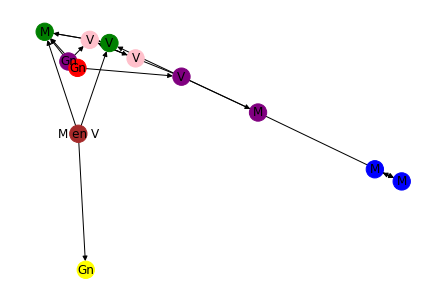

In [7]:
# YOUR CODE HERE
Aangetrokken = [(0,1),(1,0),(2,3),(3,2),(4,5),(5,4),(6,1),(6,2),(7,6),(7,4),(8,0),(8,4),(10,0),(10,7),(10,8),(11,0),(11,1),(11,9)]
Genderneutralen = {8,9}
M,V,Gn,I = {0,2,3,6},{1,4,5,7},{8,9,10},{11}

G = nx.DiGraph()
G.add_edges_from(Aangetrokken)
G.add_nodes_from(Genderneutralen)
G.add_node(11)
for n in M:
    G.nodes[n]['M']=True
    G.nodes[n]['V']=False
    G.nodes[n]['Gn']=False
for n in V:
    G.nodes[n]['V']=True
    G.nodes[n]['M']=False 
    G.nodes[n]['Gn']=False
for n in Gn:
    G.nodes[n]['V']=False
    G.nodes[n]['M']=False 
    G.nodes[n]['Gn']=True
for n in I:
    G.nodes[n]['V']=True
    G.nodes[n]['M']=True 
    G.nodes[n]['Gn']=False


def M(x, network=G):
    return network.nodes[x]['M']
def V(x, network=G):
    return network.nodes[x]['V']
def Gn(x, network=G):
    return network.nodes[x]['Gn']
def R(x,y,network=G):
    return network.has_edge(x,y)

Inter = {x for x in G
        if M(x) & V(x)}

Bi = {x for x in G for y in G for z in G
       if (M(y,G) and R(x,y,G) and V(z,G) and R(x,z,G))}.difference(Inter)
Bi

Homo = {x for x in G for y in G for z in G
        if M(x,G) and M(y,G) and R(x,y,G) and x not in Bi}.difference(Inter)
Homo

Lesbi = {x for x in G for y in G for z in G
        if V(x,G) and V(y,G) and R(x,y,G) and x not in Bi}.difference(Inter)
Lesbi 

LHBT = Bi.union(Homo).union(Lesbi)

Hetero = {x for x in G for y in G
          if (M(x,G) and V(y,G)) or (M(y,G) and V(x,G)) and R(x,y,G) }.difference(LHBT).difference(Inter)
Hetero

A = {x for x in G if G.out_degree(x) == 0}.difference(Inter)

Pan = {x for x in G for y in G for z in G for a in G
       if ((M(z,G) and V(y,G) and Gn(a,G)) or (M(y,G) and V(z,G) and Gn(a,G)) or (M(a,G) 
       and V(y,G) and Gn(z,G)) or (M(z,G) and V(a,G) and Gn(y,G))) and R(x,a,G) and R(x,y,G) and R(x,z,G)}.difference(Inter)

#Pansexuelen zijn geen Bi
Bi = Bi.difference(Pan)
kleuren = []
for node in G:
    if node in Bi:
        kleuren.append('purple')
    elif node in Homo:
        kleuren.append('blue')
    elif node in Lesbi:
        kleuren.append('pink')
    elif node in Hetero:
        kleuren.append('green')
    elif node in A:
        kleuren.append('yellow')
    elif node in Pan:
        kleuren.append('red')
    elif node in Inter:
        kleuren.append('brown')
nx.draw(G, node_color=kleuren, labels={0:'M',1:'V',2:'M',3:'M',4:'V',5:'V',6:'M',7:'V',8:'Gn',9:'Gn',10:'Gn',11:'M en V'})

print ('Biseksuelen:',Bi,'Homofielen:',Homo,'Lesbiennes:',Lesbi,'Heteroseksuelen:', Hetero, 'A-seksuelen:',A,
       'Panseksuelen:', Pan, 'Interseksuelen:',Inter)
#raise NotImplementedError()

<table>
    <tr>
        <th>Sekse</th>
        <th>Kleur</th>
    </tr>
    <tr>
        <td>Homoseksueel</td>
        <td style='background-color: blue'></td>
    </tr>
    <tr>
        <td>Biseksueel</td>
        <td style='background-color: purple'></td>
    </tr>
    <tr>
        <td>Lesbisch</td>
        <td style='background-color: pink'></td>
    </tr>
    <tr>
        <td>Heteroseksueel</td>
        <td style='background-color: green'></td>
    </tr>
    <tr>
        <td>A-seksueel</td>
        <td style='background-color: yellow'></td>
    </tr>
    <tr>
        <td>Panseksueel</td>
        <td style='background-color: red'></td>
    </tr>
    <tr>
        <td>Interseksueel</td>
        <td style='background-color: brown'></td>
    </tr>
</table>